In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bhavcopydata/30 May Positions.csv')

In [ ]:
company_data = {}

for i in df['Symbol']:
  df_temp = yf.download(i,"2021-05-29",'2022-05-30')
  company_data[i] = df_temp

In [ ]:
df_nifty = yf.download('NSE','2017-05-20','2022-05-20')
df_nifty['Returns'] = df_nifty['Close'].diff()/df_nifty['Close'].shift(1)

stddev_nifty = np.sqrt(df_nifty['Returns'].var())

print(stddev_nifty)

[*********************100%***********************]  1 of 1 completed
2.8359873875937116


In [ ]:
df_returns = pd.DataFrame()

for i in company_data:
  # company_data[i]['Returns'] = company_data[i].pct_change()
  # company_data[i]['log_returns'] = np.log(company_data[i]['Close']) - np.log(company_data[i]['Close'].shift(1))
  df_returns[i[:-3]] = company_data[i]['Close'].diff()/company_data[i]['Close'].shift(1)

In [ ]:
df_vol = df_returns.std()

for i in df_returns.columns:


In [ ]:
cov_matrix = df_returns.cov()

corr_matrix = df_returns.corr()


In [ ]:
weights = {}

for i in company_data:
  weights[i[:-3]] = float(1/3)

# print(weights)

portfolio_var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()

In [ ]:
yearly_ret_mean = df_returns.resample('Y').last().pct_change().mean()
print(yearly_ret_mean)
for i in company_data:
  portfolio_expRet = (weights[i[:-3]]*yearly_ret_mean[i[:-3]]).sum()


ICICIGI      -1.300578
KKCL          0.006831
KPRMILL      -1.345394
MGEL         -5.624648
MOHITIND     -1.858902
MMFL          0.451468
SALZERELEC   -0.010632
SHAREINDIA   -2.513651
SPARC        -0.034032
SUNDARMFIN   -1.914890
USHAMART     -3.163591
ADANITRANS   -0.479601
CIGNITITEC   -8.440070
CROMPTON     -1.647926
DABUR        -1.020259
ECLERX       -0.884164
GODREJCP     -0.719076
GRINDWELL    -2.254446
KALPATPOWR   -4.654628
MARICO       -1.691706
MAXHEALTH    -0.171567
SIS          -2.983880
dtype: float64


In [ ]:
df_standardDev = pd.DataFrame()

df_standardDev = (df_returns.std()).apply(lambda x: x*np.sqrt(250))
print(df_standardDev)

ICICIGI       0.249843
KKCL          0.459441
KPRMILL       0.458449
MGEL          1.325039
MOHITIND      0.646735
MMFL          0.429220
SALZERELEC    0.558026
SHAREINDIA    0.503042
SPARC         0.472594
SUNDARMFIN    0.262492
USHAMART      0.537689
ADANITRANS    0.498527
CIGNITITEC    0.416644
CROMPTON      0.302404
DABUR         0.220207
ECLERX        0.464030
GODREJCP      0.305541
GRINDWELL     0.345596
KALPATPOWR    0.299211
MARICO        0.245664
MAXHEALTH     0.415267
SIS           0.339669
dtype: float64


In [ ]:
portfolio_draft = pd.concat([yearly_ret_mean,df_standardDev],axis=1)
portfolio_draft.columns = ['ExpectedReturns','Volatility']

# print(portfolio_draft)

In [ ]:
p_ret = []
p_vol = []
p_weights = []

num_assets =len(df_returns.columns)
num_portfolios = 10000

for i in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)

  p_weights.append(weights)


  ret = np.dot(weights, yearly_ret_mean)
  p_ret.append(ret)

  var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
  ann_sd = np.sqrt(var*250)

  p_vol.append(ann_sd)



In [ ]:
data = {'Returns' : p_ret, 'Volatility':p_vol}

for symbol in df_returns.columns:
  for counter in range(len(df_returns.columns)):
    data[symbol[:-3]+'Weight'] = [w[counter] for w in p_weights]

df_finalPortfolios = pd.DataFrame(data)


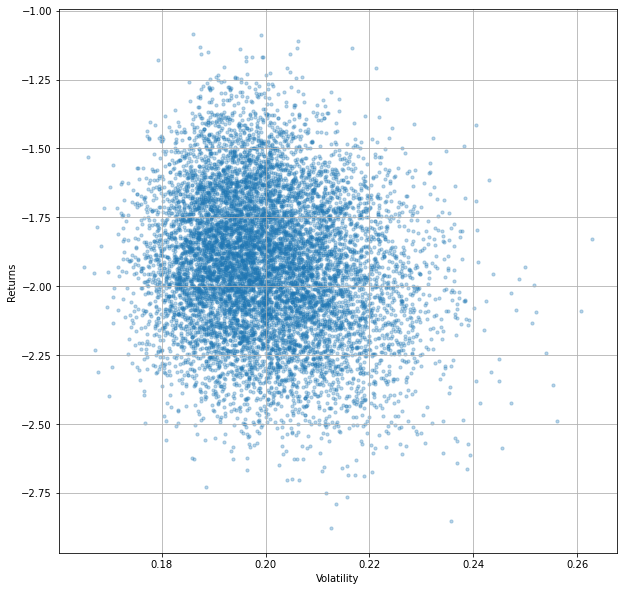

In [ ]:
df_finalPortfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

**Markowitz Optimization**

1.Minimum Volatility

In [ ]:
Portfolio_min_vol = df_finalPortfolios.iloc[df_finalPortfolios['Volatility'].idxmin()]

print(Portfolio_min_vol)

Returns         -1.931663
Volatility       0.165111
ICICWeight       0.090550
KWeight          0.090550
KPRMWeight       0.090550
MWeight          0.090550
MOHITWeight      0.090550
SALZEREWeight    0.090550
SHAREINWeight    0.090550
SPWeight         0.090550
SUNDARMWeight    0.090550
USHAMWeight      0.090550
ADANITRWeight    0.090550
CIGNITIWeight    0.090550
CROMPWeight      0.090550
DAWeight         0.090550
ECLWeight        0.090550
GODREWeight      0.090550
GRINDWWeight     0.090550
KALPATPWeight    0.090550
MARWeight        0.090550
MAXHEAWeight     0.090550
Weight           0.090550
Name: 1111, dtype: float64


2.Optimal Risk Portfolio(Sharpe Ratio)


In [ ]:
riskFreeRate = 0.0725

df_finalPortfolios['Sharpe Ratio'] = (df_finalPortfolios['Returns'] - riskFreeRate)/df_finalPortfolios['Volatility']

Portfolio_optimal_risk = df_finalPortfolios.iloc[df_finalPortfolios['Sharpe Ratio'].idxmax()]
print(Portfolio_optimal_risk)

Returns         -1.134278
Volatility       0.216572
ICICWeight       0.063669
KWeight          0.063669
KPRMWeight       0.063669
MWeight          0.063669
MOHITWeight      0.063669
SALZEREWeight    0.063669
SHAREINWeight    0.063669
SPWeight         0.063669
SUNDARMWeight    0.063669
USHAMWeight      0.063669
ADANITRWeight    0.063669
CIGNITIWeight    0.063669
CROMPWeight      0.063669
DAWeight         0.063669
ECLWeight        0.063669
GODREWeight      0.063669
GRINDWWeight     0.063669
KALPATPWeight    0.063669
MARWeight        0.063669
MAXHEAWeight     0.063669
Weight           0.063669
Sharpe Ratio    -5.572185
Name: 4149, dtype: float64


3.Jensen Ratio



4.Sortino Ratio